<a href="https://colab.research.google.com/github/rballachay/homework/blob/main/COMP551/COMP551_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segment Anything

### https://github.com/facebookresearch/segment-anything

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-9pnq0ko_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-9pnq0ko_
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 567662b0fd33ca4b022d94d3b8de896628cd32dd
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36610 sha256=12609e3ebce82714f683b75f0ad8b198cf8c34a70bc836d552e45903baaf8551
  Stored in directory: /tmp/pip-ephem-wheel-cache-0xptncr3/wheels/d5/11/03/7aca746a2c0e09f279b10436ced7175926bc38f650b736a648
Successfully built segment-anything


### Define sam model build

In [ ]:
import os
from urllib import request
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import torch
import pathlib
import cv2

SAM_MODELS = {
    "vit_h": "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth",
    "vit_l": "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth",
    "vit_b": "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth"
}

def build_sam(sam_type, device, predictor=True, output_mode = 'coco_rle'):
    url = SAM_MODELS[sam_type]
    sam_checkpoint = os.path.basename(url)
    if not os.path.exists(sam_checkpoint):
        request.urlretrieve(url, sam_checkpoint)
    sam = sam_model_registry[sam_type](checkpoint=sam_checkpoint)
    sam.to(device=device)
    if predictor:
        return SamPredictor(sam)

    if output_mode is not None:
        sam = SamAutomaticMaskGenerator(sam, output_mode = "coco_rle")
    else:
        sam = SamAutomaticMaskGenerator(sam)

    return sam

def image_getter(image_url, image_folder='images'):
    folder = pathlib.Path(image_folder)
    folder.mkdir(parents=True, exist_ok=True)
    image_name = os.path.basename(image_url)
    image_path = str(folder/image_name)
    if not os.path.exists(image_path):
        request.urlretrieve(image_url, image_path)
    return cv2.imread(image_path)

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

### Install mmdetection

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection && pip install -r requirements/build.txt && pip install "git+https://github.com/open-mmlab/cocoapi.git#subdirectory=pycocotools" && pip install .  # or "python setup.py develop"

!curl https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_1x_coco/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth --output mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth
!pip install -U openmim
!mim install mmcv
#!curl https://farm1.staticflickr.com/17/21990239_675aec2e98_z.jpg --output test.jpg

Cloning into 'mmdetection'...
remote: Enumerating objects: 35370, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 35370 (delta 8), reused 31 (delta 4), pack-reused 35311
Receiving objects: 100% (35370/35370), 47.25 MiB | 22.63 MiB/s, done.
Resolving deltas: 100% (24930/24930), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/open-mmlab/cocoapi.git to /tmp/pip-req-build-04l257al
  Running command git clone --filter=blob:none --quiet https://github.com/open-mmlab/cocoapi.git /tmp/pip-req-build-04l257al
  Resolved https://github.com/open-mmlab/cocoapi.git to commit 01f805cd54d7bd7af64c0fbd5fd96d8ca0b9ddc9
  Preparing metadata (setup.py) ... done
  Created wheel for mmpycocotools: filename=mmpycocotools-12.0.3-cp39-cp39-linux_x86_64.whl size=3

### Mount data + run mmdetection test

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

CACHE_DIR = 'drive/MyDrive/COMP551/A4'

Mounted at /content/drive/


In [ ]:
!python3 mmdetection/tools/test.py mmdetection/configs/mask_rcnn/mask-rcnn_r50_fpn_1x_coco.py mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth --work-dir . --out drive/MyDrive/COMP551/A4/rcnn_preds.pkl

04/17 15:09:50 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.9.16 (main, Dec  7 2022, 01:11:51) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 1024752422
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,

### Load bboxes from mask rcnn + run sam

In [ ]:
!mkdir -p data/coco
!cp -r drive/MyDrive/COMP551/A4/* data/coco

^C


In [ ]:
import cv2
import torch
import pycocotools.mask
import numpy as np
import pickle

with open('drive/MyDrive/COMP551/A4/rcnn_preds.pkl','rb') as _pkl:
    results = pickle.load(_pkl)

torch.cuda.empty_cache()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sam = build_sam('vit_h', device)

results_bboxes=map(lambda x:(x['img_path'],x['pred_instances']['bboxes']), results)

# iterate over all the results we have + 
sam_results=[]
for i, (path, bbox) in enumerate(results_bboxes):
    image = cv2.imread(path)
    sam.set_image(image)

    # if there are no bounding boxes, skip entirely
    x,y = bbox.shape
    if x==0:
      continue
    boxes = sam.transform.apply_boxes(bbox.cpu().detach().numpy(), sam.original_size)
    box_torch = torch.as_tensor(boxes, dtype=torch.float, device=device)
    masks, scores, logits = sam.predict_torch(
        point_coords=None,
        point_labels=None,
        boxes = box_torch,
        multimask_output=False
    )

    # we have  [n, q, x, y], need to move first index to last + select single mask
    # from index 1
    masks_encoded = np.asfortranarray(np.transpose(masks.cpu().detach().numpy()[:,0,...]))
    _sam_results_i={
        'masks':pycocotools.mask.encode(masks_encoded),
        'scores':scores.cpu().detach(),
        'image':path
    }
    sam_results.append(_sam_results_i)
    sam.reset_image()

    print(i)

    if i%1000==0 and i!=0:
      with open(f'drive/MyDrive/COMP551/A4/sam_preds_{i}.pkl','wb') as _pkl:
          pickle.dump(sam_results, _pkl, protocol=pickle.HIGHEST_PROTOCOL)

      del sam_results
      sam_results=[] 

with open(f'drive/MyDrive/COMP551/A4/sam_preds_{i}.pkl','wb') as _pkl:
    pickle.dump(sam_results, _pkl, protocol=pickle.HIGHEST_PROTOCOL)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
2

### Evaluate results from sam

In [ ]:
import pickle
import json
from mmdet.evaluation.metrics.coco_metric import CocoMetric
from mmdet.datasets.coco import CocoDataset
import pycocotools.mask
from google.colab.patches import cv2_imshow 
import cv2

# results from object detection original
with open('drive/MyDrive/COMP551/A4/rcnn_preds.pkl','rb') as _pkl:
    mm_results = pickle.load(_pkl)

sam_preds = []
for i in range(1000,6000,1000):
# results from object detection original
  with open(f'drive/MyDrive/COMP551/A4/sam_preds_{i}.pkl','rb') as _pkl:
      sam_preds.extend(pickle.load(_pkl))

# replace all the masks and scores
for item in sam_preds:
    for i in range(len(mm_results)):
        if mm_results[i]['img_path']==item['image']:
            masks = pycocotools.mask.decode(item['masks'])
            mm_results[i]['pred_instances']['masks'] = pycocotools.mask.encode(np.asfortranarray(np.swapaxes(masks,0,1)))

cocomet = CocoMetric(ann_file='data/coco/annotations/instances_val2017.json',metric=['segm'])
cocomet.dataset_meta=CocoDataset.METAINFO
cocomet.process(None, mm_results)

cocomet.evaluate(5000)

loading annotations into memory...
Done (t=1.87s)
creating index...
index created!
04/18 00:13:40 - mmengine - INFO - Evaluating segm...
Loading and preparing results...
DONE (t=1.73s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=35.08s).
Accumulating evaluation results...
DONE (t=5.97s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.356
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.551
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.382
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.177
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.389
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.507
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.508
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.508
Average Recal

{'coco/segm_mAP': 0.356,
 'coco/segm_mAP_50': 0.551,
 'coco/segm_mAP_75': 0.382,
 'coco/segm_mAP_s': 0.177,
 'coco/segm_mAP_m': 0.389,
 'coco/segm_mAP_l': 0.507}

### Plot results from sam + mask rcnn

In [ ]:
import pickle
import json
import pycocotools.mask
from google.colab.patches import cv2_imshow 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from mmdet.visualization.local_visualizer import DetLocalVisualizer
from mmengine.structures import InstanceData
from mmdet.structures import DetDataSample
from mmdet.datasets.coco import CocoDataset
import sys

# results from object detection original
with open('drive/MyDrive/COMP551/A4/rcnn_preds.pkl','rb') as _pkl:
    mm_results = pickle.load(_pkl)

sam_preds = []
for i in range(1000,6000,1000):
# results from object detection original  
  with open(f'drive/MyDrive/COMP551/A4/sam_preds_{i}.pkl','rb') as _pkl:
      sam_preds.extend(pickle.load(_pkl))

# replace all the masks and scores
for item in sam_preds:
    for i in range(len(mm_results)):
        if mm_results[i]['img_path']==item['image']:
            for version in ('sam','mask_rcnn'):
                data_sample = DetDataSample()
                gt_instances = InstanceData(metainfo={'img_shape':mm_results[i]['img_shape'], 'pad_shape':mm_results[i]['pad_shape']})
                gt_instances.bboxes = mm_results[i]['pred_instances']['bboxes']

                if version=='mask_rcnn':
                    gt_instances.masks = np.swapaxes(np.swapaxes(torch.tensor(pycocotools.mask.decode(mm_results[i]['pred_instances']['masks'])), 0, -1), -1, 1)
                else:
                    gt_instances.masks = np.swapaxes(pycocotools.mask.decode(item['masks']), 0, -1)
                gt_instances.labels = mm_results[i]['pred_instances']['labels']
                gt_instances.scores = mm_results[i]['pred_instances']['scores']

                data_sample.pred_instances = gt_instances
                dataviz=DetLocalVisualizer(line_width=0, alpha=0.6)
                dataviz.dataset_meta = CocoDataset.METAINFO
                print(item['image'])
                img = cv2.cvtColor(cv2.imread(item['image']), cv2.COLOR_BGR2RGB)
                dataviz.add_datasample('temp',img, data_sample, out_file=f"drive/MyDrive/COMP551/A4/{item['image'].split('/')[-1][:-4]}_{version}.png", draw_gt=False)

                # just one sample
                sys.exit(1)

data/coco/val2017/000000397133.jpg


SystemExit: ignored

### Run mask rcnn on LVIS annotations

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

CACHE_DIR = 'drive/MyDrive/COMP551/A4'

Mounted at /content/drive/


In [ ]:
!mkdir -p data/lvis_v1
!cp -r drive/MyDrive/COMP551/A4/* data/lvis_v1

!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection && pip install -r requirements/build.txt && pip install "git+https://github.com/open-mmlab/cocoapi.git#subdirectory=pycocotools" && pip install .  # or "python setup.py develop"

!curl https://download.openmmlab.com/mmdetection/v2.0/lvis/mask_rcnn_r50_fpn_sample1e-3_mstrain_1x_lvis_v1/mask_rcnn_r50_fpn_sample1e-3_mstrain_1x_lvis_v1-aa78ac3d.pth --output mask_rcnn_r50_fpn_sample1e-3_mstrain_1x_lvis_v1-aa78ac3d.pth
!pip install -U openmim
!mim install mmcv
!pip install git+https://github.com/lvis-dataset/lvis-api.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 35370, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 35370 (delta 8), reused 31 (delta 4), pack-reused 35311
Receiving objects: 100% (35370/35370), 47.25 MiB | 27.57 MiB/s, done.
Resolving deltas: 100% (24930/24930), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/open-mmlab/cocoapi.git to /tmp/pip-req-build-65i9rkr2
  Running command git clone --filter=blob:none --quiet https://github.com/open-mmlab/cocoapi.git /tmp/pip-req-build-65i9rkr2
  Resolved https://github.com/open-mmlab/cocoapi.git to commit 01f805cd54d7bd7af64c0fbd5fd96d8ca0b9ddc9
  Preparing metadata (setup.py) ... done
  Created wheel for mmpycocotools: filename=mmpycocotools-12.0.3-cp39-cp39-linux_x86_64.whl size=3

In [ ]:
!python3 mmdetection/tools/test.py /content/mmdetection/configs/lvis/mask-rcnn_r50_fpn_sample1e-3_ms-1x_lvis-v1.py  drive/MyDrive/COMP551/A4/mask_rcnn_r50_fpn_sample1e-3_mstrain_1x_lvis_v1-aa78ac3d.pth --work-dir . --out drive/MyDrive/COMP551/A4/rcnn_preds_LVIS.pkl

04/19 21:18:00 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.9.16 (main, Dec  7 2022, 01:11:51) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 1410157558
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,

### NOTE
 
In order to get this to work, you need to insert the following in line 199:208 of mmdetection/mmdet/evaluation/metrics/lvis_metric.py

```python
result['masks'] = pred['masks']
# encode mask to RLE
#if 'masks' in pred:
#    result['masks'] = encode_mask_results(
#        pred['masks'].detach().cpu().numpy())
# some detectors use different scores for bbox and mask
            
```

This is because we are loading the files with rle already encoded. Now, we can re-install mmdetection (make sure to restart the runtime so we load the new package version)

In [ ]:
!cd mmdetection && pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/mmdetection
  Preparing metadata (setup.py) ... done
  Created wheel for mmdet: filename=mmdet-3.0.0-py3-none-any.whl size=1707036 sha256=465ed2b5efe54e12e17de6563131cfff3b63c0908d806e5b3be6eb3b98d54b59
  Stored in directory: /tmp/pip-ephem-wheel-cache-zhmld6uv/wheels/13/b6/b0/4a28c569737d1538a0930caeea72e09253afe826482814abce
Successfully built mmdet
  Attempting uninstall: mmdet
    Found existing installation: mmdet 3.0.0
    Uninstalling mmdet-3.0.0:
      Successfully uninstalled mmdet-3.0.0


### Run LVIS proposal evaluation on mask rcnn

In [ ]:
import pickle
from mmdet.evaluation.metrics.lvis_metric import LVISMetric
from mmdet.datasets.lvis import LVISDataset
import torch

with open('drive/MyDrive/COMP551/A4/rcnn_preds_LVIS.pkl','rb') as _pkl:
    results = pickle.load(_pkl)

for _res in results:
    _res['pred_instances']['labels'] = torch.zeros_like(_res['pred_instances']['labels'], dtype=torch.int32)

lvismet = LVISMetric(ann_file='data/lvis_v1/annotations/lvis_v1_val.json',metric=['proposal_fast'])
lvismet.dataset_meta=LVISDataset.METAINFO
lvismet.process(None, results)

lvismet.evaluate(1000)

04/19 21:44:22 - mmengine - INFO - Evaluating proposal_fast...
04/19 21:44:23 - mmengine - INFO - 
+------+-------+-------+-------+-------+-------+-------+-------+-------+--------------------+-------+
|      | 0.5   | 0.55  | 0.6   | 0.65  | 0.7   | 0.75  | 0.8   | 0.85  | 0.8999999999999999 | 0.95  |
+------+-------+-------+-------+-------+-------+-------+-------+-------+--------------------+-------+
| 100  | 0.692 | 0.673 | 0.646 | 0.612 | 0.566 | 0.514 | 0.437 | 0.328 | 0.193              | 0.041 |
| 300  | 0.789 | 0.767 | 0.740 | 0.706 | 0.657 | 0.597 | 0.509 | 0.393 | 0.244              | 0.063 |
| 1000 | 0.789 | 0.767 | 0.740 | 0.706 | 0.657 | 0.597 | 0.509 | 0.393 | 0.244              | 0.063 |
+------+-------+-------+-------+-------+-------+-------+-------+-------+--------------------+-------+
04/19 21:44:23 - mmengine - INFO - 
AR@100	0.4703
AR@300	0.5466
AR@1000	0.5466


{'lvis/AR@100': 0.47029833670685567,
 'lvis/AR@300': 0.5465810085364782,
 'lvis/AR@1000': 0.5465810085364782}

### Run SAM for object proposal

In [ ]:
import cv2
import torch
import pycocotools.mask
import numpy as np
import pickle
from segment_anything.automatic_mask_generator import coco_encode_rle

with open('drive/MyDrive/COMP551/A4/rcnn_preds_LVIS.pkl','rb') as _pkl:
    results = pickle.load(_pkl)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sam = build_sam('vit_h', device, False)

# iterate over all the results we have + 
sam_results=[]
for i, _result  in enumerate(results):
    image = cv2.imread(_result['img_path'])

    mask_data = sam._generate_masks(image)
    mask_data = sam.postprocess_small_regions(
                mask_data,
                sam.min_mask_region_area,
                max(sam.box_nms_thresh, sam.crop_nms_thresh),
            )
    masks = [coco_encode_rle(rle) for rle in mask_data["rles"]]

    bboxes = torch.from_numpy(np.stack(mask_data["boxes"]))
    scores = torch.from_numpy(np.stack(mask_data["iou_preds"]))
    labels = torch.zeros_like(scores, dtype=torch.int32)

    _result['pred_instances']['masks'] = masks
    _result['pred_instances']['scores'] = scores
    _result['pred_instances']['bboxes'] = bboxes 
    _result['pred_instances']['labels'] = labels

with open(f'drive/MyDrive/COMP551/A4/sam_preds_LVIS.pkl','wb') as _pkl:
    pickle.dump(results, _pkl, protocol=pickle.HIGHEST_PROTOCOL)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

###  Evaluate SAM object proposals

In [ ]:
import pickle
import json
from mmdet.evaluation.metrics.lvis_metric import LVISMetric
from mmdet.datasets.lvis import LVISDataset
import pycocotools.mask


with open('drive/MyDrive/COMP551/A4/sam_preds_LVIS.pkl','rb') as _pkl:
    results = pickle.load(_pkl)

lvismet = LVISMetric(ann_file='data/lvis_v1/annotations/lvis_v1_val.json',metric=['proposal_fast'])
lvismet.dataset_meta=LVISDataset.METAINFO
lvismet.process(None, results)

lvismet.evaluate(1000)

04/19 23:42:00 - mmengine - INFO - Evaluating proposal_fast...


/usr/local/lib/python3.9/dist-packages/mmdet/evaluation/functional/recall.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_ious = np.array(all_ious)


04/19 23:42:01 - mmengine - INFO - 
+------+-------+-------+-------+-------+-------+-------+-------+-------+--------------------+-------+
|      | 0.5   | 0.55  | 0.6   | 0.65  | 0.7   | 0.75  | 0.8   | 0.85  | 0.8999999999999999 | 0.95  |
+------+-------+-------+-------+-------+-------+-------+-------+-------+--------------------+-------+
| 100  | 0.549 | 0.533 | 0.517 | 0.500 | 0.479 | 0.446 | 0.400 | 0.327 | 0.217              | 0.076 |
| 300  | 0.630 | 0.610 | 0.590 | 0.567 | 0.539 | 0.497 | 0.437 | 0.350 | 0.226              | 0.076 |
| 1000 | 0.631 | 0.611 | 0.591 | 0.568 | 0.539 | 0.497 | 0.437 | 0.350 | 0.226              | 0.076 |
+------+-------+-------+-------+-------+-------+-------+-------+-------+--------------------+-------+
04/19 23:42:01 - mmengine - INFO - 
AR@100	0.4044
AR@300	0.4521
AR@1000	0.4526


{'lvis/AR@100': 0.4043650444424888,
 'lvis/AR@300': 0.452125319017865,
 'lvis/AR@1000': 0.45261814661621047}

### Plot SAM and MASK RCNN object proposals

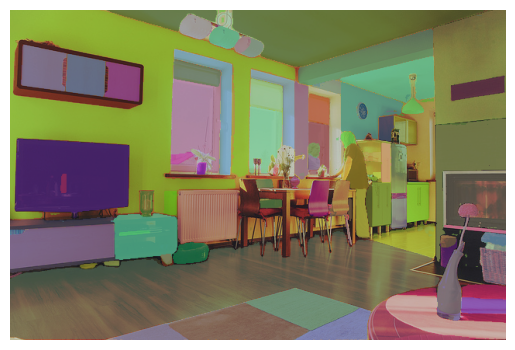

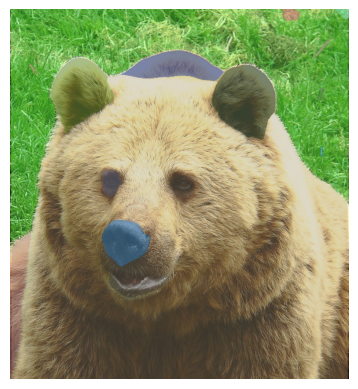

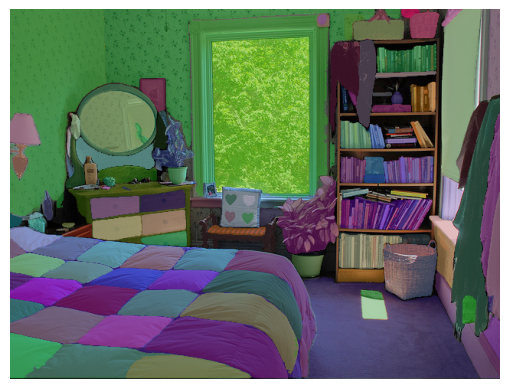

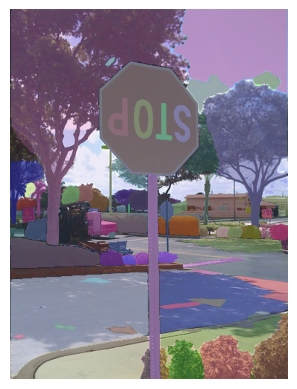

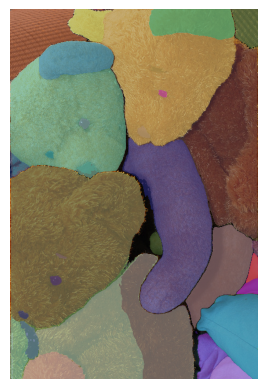

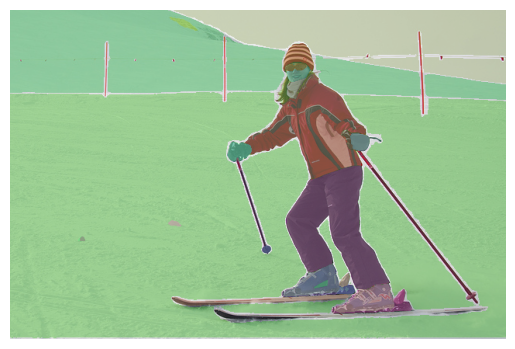

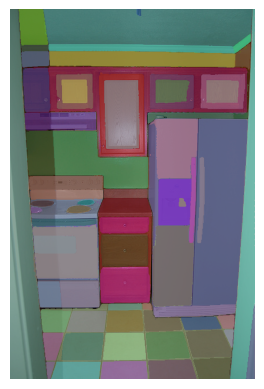

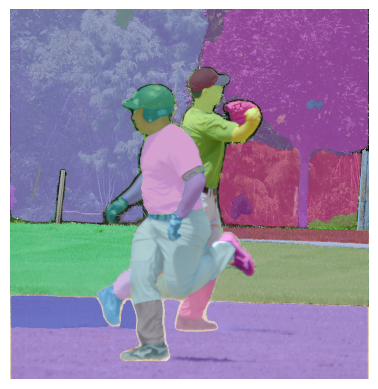

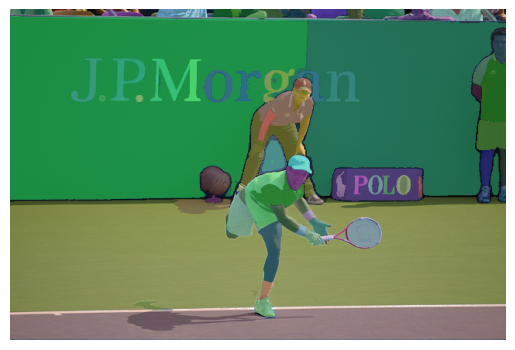

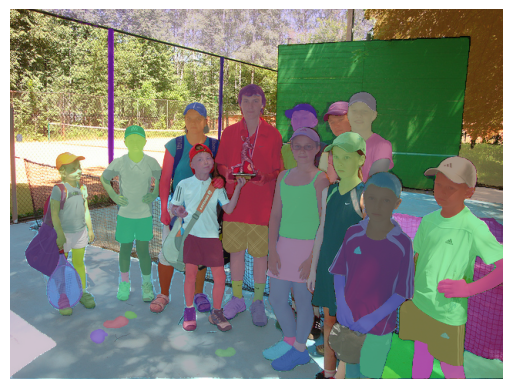

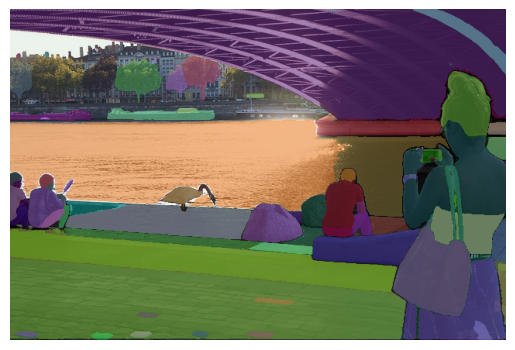

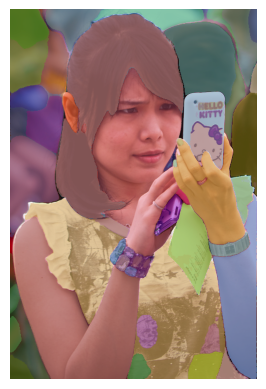

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2
import torch

#sam = build_sam('vit_h', 'cuda', False, None)
imgs = os.listdir('data/coco/val2017')

for i,_img in enumerate(sorted(imgs)):
    image = cv2.imread(f'data/coco/val2017/{_img}')
    masks = sam.generate(image)

    plt.figure(dpi=100)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    show_anns(masks)
    plt.axis('off')
    #plt.show()
    plt.savefig(f'drive/MyDrive/COMP551/A4/imgs_mask/{_img[:-4]}_sam.png')

    if i>10:
        break

In [ ]:
import pickle
import pycocotools.mask
import cv2
import matplotlib.pyplot as plt
from mmdet.visualization.local_visualizer import DetLocalVisualizer
from mmengine.structures import InstanceData
from mmdet.structures import DetDataSample
from mmdet.datasets.lvis import LVISDataset
import sys

# results from object detection original
with open('drive/MyDrive/COMP551/A4/rcnn_preds_LVIS.pkl','rb') as _pkl:
    mm_results = pickle.load(_pkl)

mm_results = list(sorted(mm_results,key=lambda x: x['img_path']))

# replace all the masks and scores
for i in range(len(mm_results)):
    masks = np.swapaxes(np.swapaxes(torch.tensor(pycocotools.mask.decode(mm_results[i]['pred_instances']['masks'])), 0, -1), -1, 1)

    masks = [i[0,...] for i in torch.split(masks,1,0)]
    
    masks = [{'segmentation':i, 'area':10} for i in masks]
    plt.figure(dpi=100)
    img = cv2.imread(mm_results[i]['img_path'])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    show_anns(masks)
    plt.axis('off')
    #plt.show()
    plt.savefig(f'drive/MyDrive/COMP551/A4/imgs_mask/{mm_results[i]["img_path"].split("/")[-1][:-4]}_mask_rcnn.png')
